# Predicting CrossFit performance

## Introduction

CrossFit is a high-intensity fitness program that combines elements of weightlifting, cardio, and gymnastics. It aims to improve overall physical fitness by incorporating constantly varied functional movements performed at a high intensity. At the pinnacle of CrossFit is the CrossFit Games, an annual competition that showcases the world's fittest athletes. The CrossFit Games serve as a platform for elite athletes to test their skills and compete in a wide range of demanding workouts, challenging their strength, speed, power, and mental resilience. In this analysis, we will delve into the performance of CrossFit athletes, examining key factors that contribute to their success in this highly demanding and competitive sport.  

In a previous project, <i> A data-based approach to CrossFit training</i>, a dataset containing competition results, demographic information, lifestyle and training habits was explored to improve guidelines for training. The dataset used in this project was provided by Ulrik Pedersen and can be found on [Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/crossfit-athletes). Many of the factors correlated to CrossFit performance have a non-linear or non-monotonic functionality. Factors with the strongest correlation to performance were age, gender and body composition. 

## Project overview

In this project, we will predict total weight lifted in four events normalized by athlete body weight: the back squat, the deadlift, the clean and jerk, and the snatch. The total weight is normalized with athlete body weight to negate momentum effects and isolate the athletic contribution of the lift. Three predictive models were optimized and used to predict the total normalized lift: 
-	Random forest regression
-	XGBoost
-	Neural network
The XGBoost and the random forest models are known to work well with tabular data, and all of these models are suitable for capturing non-linear dependencies. In order to benchmark the performance of these models, their performance was compared with my ability to predict total lift from the provided data. 

## Project outline

 - Introduction
 - Project outline 
 - Data overview
 - Selecting input features
 - Random forest regression model
 - XGBoost
    - Model optimization
    - Feature importance
- Neural network 
- Benchmarking model performance
- Conclusions


### Data overview

Cleaned data is imported from <i>A data-based approach to CrossFit</i>.

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle

In [88]:
os.chdir('C:\\Users\\corne\\OneDrive\\Documents\\DS_Portfolio\\crossfit_project\\crossfit_project')
df = pd.read_pickle('cleaned_cf_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28995 entries, 21 to 422961
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         28995 non-null  object 
 1   gender         28995 non-null  object 
 2   age            28995 non-null  float64
 3   height         28995 non-null  float64
 4   weight         28995 non-null  float64
 5   candj          28995 non-null  float64
 6   snatch         28995 non-null  float64
 7   deadlift       28995 non-null  float64
 8   backsq         28995 non-null  float64
 9   eat            28995 non-null  object 
 10  background     28995 non-null  object 
 11  experience     28995 non-null  object 
 12  schedule       28995 non-null  object 
 13  howlong        28995 non-null  object 
 14  rec            28995 non-null  int32  
 15  high_school    28995 non-null  int32  
 16  college        28995 non-null  int32  
 17  pro            28995 non-null  int32  
 18  no_b

In [89]:
df.head()

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong,rec,high_school,college,pro,no_background,exp_coach,exp_alone,exp_courses,life_changing,exp_trainer,exp_level1,...,sched_0extra,sched_1extra,sched_2extra,sched_3extra,sched_nr,rest_nr,exp_1to2yrs,exp_2to4yrs,exp_4plus,exp_6to12mo,exp_lt6mo,eat_conv,eat_cheat,eat_quality,eat_paleo,eat_weigh,US,gender_,norm_dl,norm_j,norm_s,norm_bs,total_lift,BMI,bmi_rounded
21,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|,1,1,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1.925000,1.175000,0.875000,1.575000,5.550000,27.894029,28.0
22,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|,0,0,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1.903409,1.062500,0.761364,1.443182,5.170455,25.253091,25.0
27,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1.955556,1.266667,0.911111,1.800000,5.933333,34.210754,34.0
50,North Central,Male,36.0,71.0,199.0,267.0,212.0,485.0,390.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,1-2 years|,0,1,1,0,0,1,0,0,1,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,2.437186,1.341709,1.065327,1.959799,6.804020,27.754559,28.0
60,North East,Male,36.0,64.0,155.0,245.0,180.0,415.0,385.0,I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 2x a week|I st...,4+ years|,1,1,1,0,0,0,1,1,1,1,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,2.677419,1.580645,1.161290,2.483871,7.903226,26.605395,27.0


## Selecting input features

Features are selected for predictive modeling. Features that are redundant, have been otherwise encoded, or have been engineered into new features are not selected. Individual event performances are also dropped, and the sole target is the total weight lifted normalized by athlete bodyweight.

A description of each feature if ambiguous is summarized below: 

| Feature     | Description |
| ----------- | ----------- |
| rec    | plays or has played recreational sports      |
| high_school   | played high school sports      |
| college  | played college sports     |
| pro   | played professional level sports     |
| no_background  | has no athletic background    |
| exp_coach    | started CrossFit with a coach     |
| exp_alone   | started CrossFit alone    |
| exp_start_nr  | did not indicate if started alone or with coach     |
| life_changing  | indicates if CrossFit has been life changing    |
| exp_trainer   | has worked as a CrossFit coach     |
| exp_level1   | has completed a level 1 class      |
| rest_plus  | takes 4+ rest days per month      |
| rest_minus   | takes less than 4 rest days per month     |
| rest_sched   | intentionally schedules rest days    |
| rest_nr   | no response on rest day frequency    |
| sched_nr   | no response on rest day scheduling    |
| sched_0extra    | does not do two a day training sessions      |
| sched_1extra   | does one two a day training sessions per week     |
| sched_2extra   | does two two a day training sessions per week      |
| sched_3extra   | does three or more two a day training sessions per week     |
| exp_*    | CrossFit age/experience doing CrossFit     |
| eat_conv   | eats what is convenient     |
| eat_cheat | eats cheat meals     |
| eat_quality   | eats high quality foods     |
| eat_paleo  | follows paleo diet     |
| eat_weigh    | weighs food     |
| US   | athlete competes in the US    |

In [52]:
df_select = df.drop(columns=['region','height','weight','candj','snatch','deadlift','norm_bs', 'norm_dl', 'norm_j', 'norm_s','bmi_rounded','backsq','eat','background','experience','schedule','howlong','gender'])
print('Selected features:\n',df_select.columns.values)

Selected features:
 ['age' 'rec' 'high_school' 'college' 'pro' 'no_background' 'exp_coach'
 'exp_alone' 'exp_courses' 'life_changing' 'exp_trainer' 'exp_level1'
 'exp_start_nr' 'rest_plus' 'rest_minus' 'rest_sched' 'sched_0extra'
 'sched_1extra' 'sched_2extra' 'sched_3extra' 'sched_nr' 'rest_nr'
 'exp_1to2yrs' 'exp_2to4yrs' 'exp_4plus' 'exp_6to12mo' 'exp_lt6mo'
 'eat_conv' 'eat_cheat' 'eat_quality' 'eat_paleo' 'eat_weigh' 'US'
 'gender_' 'total_lift' 'BMI']


### Random forest regression model

The random forest regressor randomly selects subsets of the original dataset with replacement, creating multiple training sets known as bootstrap samples. For each bootstrap sample, a decision tree is constructed using a subset of features. The decision tree is built by recursively splitting the data based on the selected features and their optimal thresholds. The final prediction is obtained by aggregating or "bagging" the individual predictions made by each decision tree. Random forest regression models work well with tabular data, large datasets, high-dimensional data, and non-linear data. 

In our modeling we use the root mean squared error is used as a cost function: 

<img src="https://miro.medium.com/max/327/1*9hQVcasuwx5ddq_s3MFCyw.gif" />


In [56]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [57]:
#Assigning test and train sets
train_set, test_set = train_test_split(df_select, test_size=0.2, random_state=10)

X_train, y_train = train_set.drop(columns=['total_lift']), train_set['total_lift']
X_test, y_test = test_set.drop(columns=['total_lift']), test_set['total_lift']

In [90]:
#fit score
rnd_clf = RandomForestRegressor(n_estimators=100, max_depth = 12,oob_score=True, random_state=10).fit(X_train,y_train)
rnd_pred = rnd_clf.predict(X_test)
rnd_score = mean_squared_error(y_test, rnd_pred,squared=False)
print(f'Random forest regression model RMSE: \n{rnd_score.round(3)}')

Random forest regression model RMSE: 
0.863


## XGBoost

### Model optimization

XGBoost stands for eXtreme gradient boosting and is a gradient boosted trees algorithm. In boosting, trees are sequentially built such that each subsequent tree aims to reduce the errors of the previous tree. Custom XGBoost callbacks were created during model optimization to control learning rate decay, implement early stopping, and plot training results. A schematic of this iterative process is shown in the figure below.
<br>
<br>
<img src="https://docs.aws.amazon.com/images/sagemaker/latest/dg/images/xgboost_illustration.png" />
</br>
<br>
Image from [AWS, How XGBoost Works](https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html)
</br>

XGBoost has been shown to be highly accurate, often out-performing other models in Kaggle competitions. Optimizations to the XGBoost algorithm underlie this predictive power. For example, XGBoost grows trees up to a specifiable maximum depth and prunes backwards to improve model fit. This is unlike other algorithms that build trees from the top down and stop once a negative loss is encountered on a single splitting step using a "greedy" algorithm. Additionally, there is built in regularization to avoid overfitting and capacity for parallelization.


In [60]:
#defining custom learning rate decay
def learning_rate_decay(boosting_round): #, num_boost_round):
    learning_rate_start = 0.4
    learning_rate_min = 0.05
    lr_decay = 0.7
    lr = learning_rate_start * np.power(lr_decay, boosting_round)
    return max(learning_rate_min, lr)

lr_callback = xgb.callback.LearningRateScheduler(learning_rate_decay)

In [61]:
#defining callback for plotting XGBoost fit progress, adapting from XGBoost documentation
class Plotting(xgb.callback.TrainingCallback):
    def __init__(self, rounds):
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111)
        self.rounds = rounds
        self.lines = {}
        self.fig.show()
        self.x = np.linspace(0, self.rounds, self.rounds)
        plt.ion()

    def _get_key(self, data, metric):
        return f'{data}-{metric}'

    def after_iteration(self, model, epoch, evals_log):
        if not self.lines:
            for data, metric in evals_log.items():
                for metric_name, log in metric.items():
                    key = self._get_key(data, metric_name)
                    expanded = log + [0] * (self.rounds - len(log))
                    self.lines[key],  = self.ax.plot(self.x, expanded, label=key)
                    self.ax.legend()
        else:
            for data, metric in evals_log.items():
                for metric_name, log in metric.items():
                    key = self._get_key(data, metric_name)
                    expanded = log + [0] * (self.rounds - len(log))
                    self.lines[key].set_ydata(expanded)
            self.fig.canvas.draw()
        return False

In [62]:
#defining early stopping callback
es = xgb.callback.EarlyStopping(rounds=100,save_best=True)

Training and evluation RMSE scores:
[0]	train-rmse:3.80923	eval-rmse:3.81266


C:\Users\corne\AppData\Local\Temp\ipykernel_3540\1138537394.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


[100]	train-rmse:0.82707	eval-rmse:0.85081
[200]	train-rmse:0.81175	eval-rmse:0.84634
[300]	train-rmse:0.80052	eval-rmse:0.84445
[400]	train-rmse:0.79081	eval-rmse:0.84269
[500]	train-rmse:0.78215	eval-rmse:0.84173
[600]	train-rmse:0.77440	eval-rmse:0.84027
[700]	train-rmse:0.76668	eval-rmse:0.83956
[800]	train-rmse:0.75950	eval-rmse:0.83924
[900]	train-rmse:0.75302	eval-rmse:0.83926
[1000]	train-rmse:0.74687	eval-rmse:0.83898
[1100]	train-rmse:0.74078	eval-rmse:0.83858
[1123]	train-rmse:0.73955	eval-rmse:0.83868


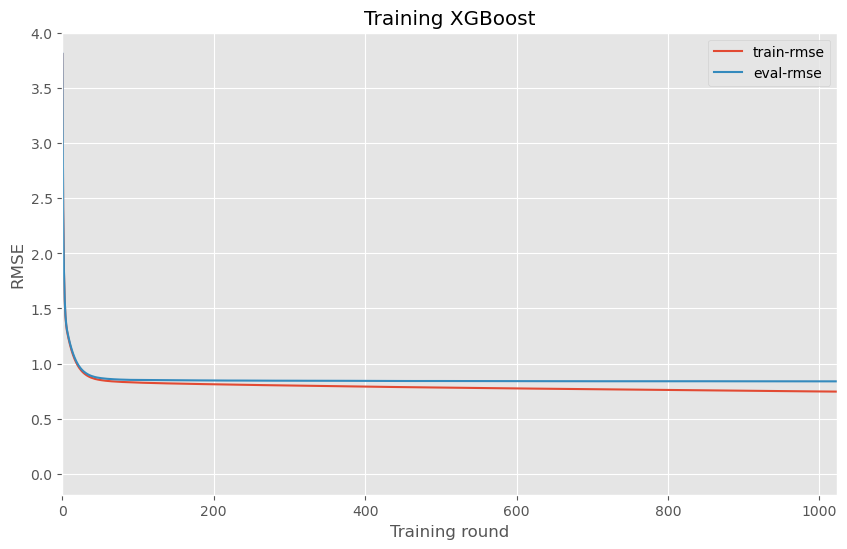

In [63]:
#XGBoost 
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {'max_depth': 4,'subsample':.6,'reg_alpha':0}
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 1500
print('Training and evluation RMSE scores:')
#bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval=100,early_stopping_rounds=100,callbacks=[lr_callback, Plotting(num_round)])
bst= xgb.train(param, dtrain, num_round, evals=evallist, verbose_eval=100,callbacks=[lr_callback, Plotting(num_round),es])
plt.xlabel('Training round')
plt.ylabel('RMSE');
plt.title('Training XGBoost')
plt.xlim((0,bst.best_iteration));

In [91]:
bst_pred = bst.predict(dtest)
bst_rmse = mean_squared_error(y_test, bst_pred,squared=False)

print('Best iteration and RMSE:')
bst.best_iteration, round(bst_rmse,3)

Best iteration and RMSE:


(1024, 0.839)

In [65]:
print('Improvement over random forest regression model:')
improvement = (rnd_score - bst_rmse)/rnd_score *100
print(str(round(improvement,1))+'%')

Improvement over random forest regression model:
2.8%


### Feature Importance
One benefit of using tree-based models is the ability to extract the predictive importance of input features. For random forest models, there is a built-in feature importance metric included in the scikit-learn package that indicates the average improvement to a prediction when each feature is used as a splitting node. For XGBoost models, the built in feature importance metrics are expanded and include weight, gain or cover metrics. Gain is most like the random forest feature importance metric, while weight represents the relative number of times a feature is used as a splitting node and cover represents the number of observations split by a feature. While potentially insightful, these metrics tend to inflate the importance of continuous or high-cardinality categorical variables. 

Permutation importance algorithms evaluate the importance of a feature by comparing the performance of the baseline model to the performance with each feature permuted. This strategy does not require sequentially retraining the model necessarily but instead re-runs a trained model with each input feature permutated. The built-in Scikit-learn permutation importance function cannot be used with XGBoost. Thus, a custom permutation algorithm is developed here. 

In [73]:
def feature_importance(bst, X_test, y_test):
    baseline_d = xgb.DMatrix(X_test, label=y_test)
    y_baseline = bst.predict(baseline_d)
    baseline = mean_squared_error(y_test, y_baseline,squared=False)
    
    f_imp = []
    
    for col in X_test.columns:
        save = X_test[col].copy()
        X_test[col] = np.random.permutation(X_test[col])

        perm_d = xgb.DMatrix(X_test, label=y_test)
        y_perm = bst.predict(perm_d)
        perm_baseline = mean_squared_error(y_test, y_perm, squared=False)
        f_imp.append(perm_baseline-baseline)
        
        X_test[col] = save #resets values
       
    return pd.DataFrame(data = f_imp, index = X_test.columns.values).sort_values(0,ascending=False).plot(kind='bar',ylabel = 'Decrease in RMSE from baseline', title='Feature Importance by permutation',legend=False)

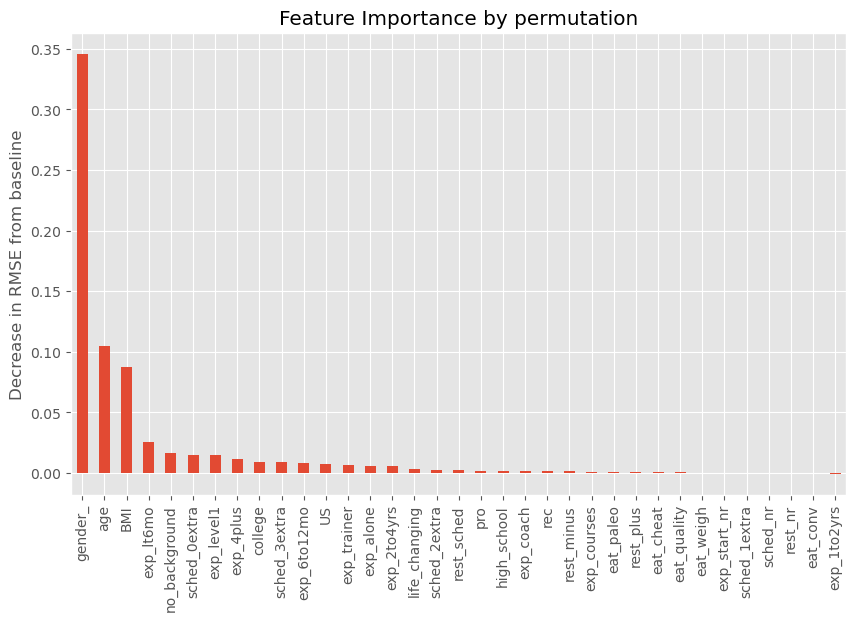

In [74]:
feature_importance(bst, X_test, y_test);

The most significant decreases to the RMSE were observed when gender, age and BMI were permutated. This is in line with strong the correlations observed in our previous work with these features and performance. Secondary features of importance were CrossFit age, frequency of extra training sessions, athletic background, and region. Interestingly, taking rest days and all dietary habits were not of consequence to the model. It is possible that these behaviors don't significantly affect performance.

## Neural network

A dense neural network was created to predict CrossFit athlete performance.  Neural networks are useful in situations where identifying complex patterns aids in predictive performance. Neural networks have been outperformed by XGBoost when working with smaller amounts of data and tabular data. 

In [79]:
import tensorflow as tf
from keras.layers import Dropout, BatchNormalization
from functools import partial 

In [80]:
#splitting test data to make a validation dataset
valid_set_nn, test_set_nn = train_test_split(test_set, test_size=0.5, random_state=10)
X_valid_nn = valid_set_nn.drop(columns=['total_lift'])
y_valid_nn = valid_set_nn['total_lift'].values.reshape(-1,1)
X_test_nn = test_set_nn.drop(columns=['total_lift'])
y_test_nn = test_set_nn['total_lift']

In [81]:
#building neural network
tf.random.set_seed(10)

layer_size = 300
RegularizedDense = partial(tf.keras.layers.Dense,
                           activation = 'relu',
                           kernel_initializer='he_normal')
                           #kernel_regularizer = tf.keras.regularizers.l2(0.001))

model = tf.keras.Sequential([
    tf.keras.Input(shape=[X_train.shape[1]]),
    BatchNormalization(name = 'Batch_Normalization'),
    RegularizedDense(layer_size, name = "Dense_1"),
    Dropout(0.3, name = 'Dropout_1'),
    RegularizedDense(layer_size, name = "Dense_2"),
    Dropout(0.3, name= 'Dropout_2'),
    tf.keras.layers.Dense(1, activation='relu', name = 'Dense_3')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=30,
    decay_rate=0.99)
    
opt = tf.keras.optimizers.experimental.AdamW(learning_rate=lr_schedule)
                   
model.compile(loss='mse',
              optimizer = opt,
              metrics=['RootMeanSquaredError']
             )

model.training=True
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Batch_Normalization (BatchN  (None, 35)               140       
 ormalization)                                                   
                                                                 
 Dense_1 (Dense)             (None, 300)               10800     
                                                                 
 Dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 Dense_2 (Dense)             (None, 300)               90300     
                                                                 
 Dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 Dense_3 (Dense)             (None, 1)                 301       
                                                        


A shallow neural network with two hidden layers was created to predict the normalized total lift. The number of neurons in each hidden layer was adjusted upwards until the model overfit the training data, and then regularization techniques were added to prevent overfitting. Dropout was the most effective regularization method sampled, and was used over kernel regularization, gradient clipping, and other techniques. It is possible that the ensemble effect observed with dropout was particularly beneficial to this dataset. The final model had 300 neurons in each of two hidden layers and two dropout layers.   


In [82]:
history = model.fit(X_train, y_train, epochs=30, verbose=False, validation_data=(X_valid_nn, y_valid_nn))

In [83]:
model.training=False
y_pred_nn = model.predict(X_test_nn, verbose=False)
nn_rmse = mean_squared_error(y_test_nn, y_pred_nn,squared=False)
print('Neural network RMSE:')
round(nn_rmse,3)

Neural network RMSE:


0.863

XGBoost outperformed the shallow neural network on this dataset. The neural network model had a higher bias than the tree-based models.

## Benchmarking model performance

To benchmark model performance, 10 random participants were selected. After careful study and review, I predicted each participant’s normalized total lift from the input features. The RMSE of my predictions is calculated for comparison to the other models. Optimally, the predictions of a team of CrossFit experts and coaches would be used, but lacking these resources my judgement will be used to estimate human-level predictive power. 

In [84]:
#selecting index 
benchmark = df_select.sample(n=10, random_state=10)
benchmark_X = benchmark.drop(columns=['total_lift'])
benchmark_y = benchmark['total_lift']
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)
benchmark_X

,age,rec,high_school,college,pro,no_background,exp_coach,exp_alone,exp_courses,life_changing,exp_trainer,exp_level1,exp_start_nr,rest_plus,rest_minus,rest_sched,sched_0extra,sched_1extra,sched_2extra,sched_3extra,sched_nr,rest_nr,exp_1to2yrs,exp_2to4yrs,exp_4plus,exp_6to12mo,exp_lt6mo,eat_conv,eat_cheat,eat_quality,eat_paleo,eat_weigh,US,gender_,BMI
196036,27.0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,20.254429
158151,18.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,26.608364
81732,23.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,25.632724
13402,31.0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,28.889081
61466,36.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,43.941813
4714,33.0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,28.696694
259,27.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,24.394286
155078,39.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,28.128842
126860,34.0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,27.046190
103760,20.0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,28.974775


In [85]:
#my guesses
my_y = [5.5,7,6.5,6,4,6,8,4,5,6]
#my RMSE
my_rmse = mean_squared_error(benchmark_y, my_y,squared=False)
print('My RMSE:')
round(my_rmse, 3)

My RMSE:


1.782

In [96]:
#Summary of model performance
p = pd.DataFrame([rnd_score, bst_rmse, nn_rmse, my_rmse],index=['Random Forest','XGBoost','Neural network','Me'],columns=['RMSE']).T.round(3)
p.T.sort_values('RMSE')

,RMSE
XGBoost,0.839
Random Forest,0.863
Neural network,0.863
Me,1.782


XGBoost outperformed the shallow neural network on this dataset. The neural network model had a higher bias than the tree-based models. 

## Conclusions

Given the strong correlations observed in my previous project, <i> A data-based approach to CrossFit training</i>, it is reasonable that predictive models could be built and optimized to predict CrossFit performance. Indeed, all selected models out-perform my predictive human-level abilities by a significant margin. 

The top performing model was XGBoost by ~3%. XGBoost is particularly well suited for this type of non-linear, tabular data and outperformed the random forest and neural network models. A custom feature importance algorithm was built to determine the feature importance for XGBoost using a permutation algorithm. The most important features were gender, age and body composition, while taking rest day and eating paleo were not important to the model.
